<a href="https://colab.research.google.com/github/thinhtoohan/curvefitting/blob/main/curve_fitting_12_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Data Initialization

In [2]:
X = np.array([0, 0.5, 1, 1.5, 1.9, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.6, 7, 7.6, 8.5, 9, 10])
y = np.array([1, 0.9, 0.7, 1.5, 2, 2.4, 3.2, 2, 2.7, 3.5, 1, 4, 3.6, 2.7, 5.7, 4.6, 6.0, 6.8, 7.3])

### Scatter Plot
From the scatter plot, we can see the upward trend in y as x increases.

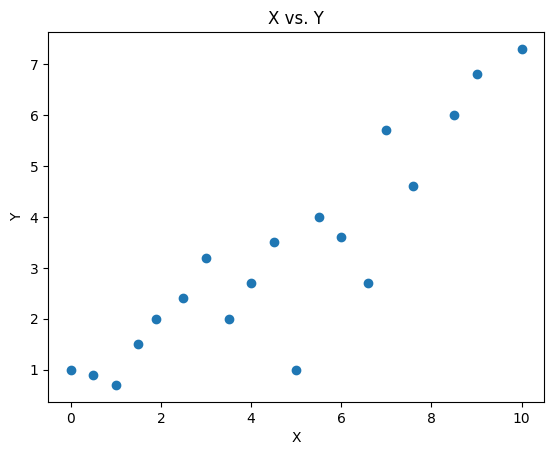

In [11]:
fig, ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('X vs. Y')
plt.show()

### Linear Regression

In [4]:
lr = LinearRegression()
lr.fit(X.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

Intercept and slope of the regression line are as follows.

In [5]:
print("Slope: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Slope:  [[0.61077172]]
Intercept:  [0.42612616]


### Polynomial Regression
We can fit a degree-2 polynomial to the data as well to see if it is more suited.

In [6]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features,y)

LinearRegression()

In [7]:
print("Regression Coefficients: ", poly_reg_model.coef_)
print("Intercept: ", poly_reg_model.intercept_)

Regression Coefficients:  [0.16803115 0.04580581]
Intercept:  1.1036336950108052


### Plot with both fitted models

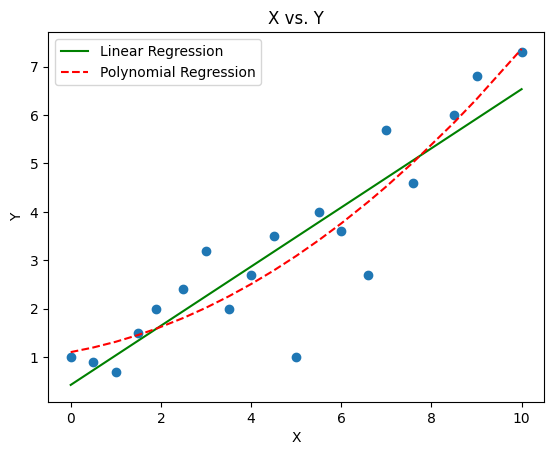

In [14]:
fig, ax = plt.subplots()

ax.scatter(X,y)

X_ = np.arange(0,11,0.5).reshape(-1,1)
ax.plot(X,((lr.coef_*X)+lr.intercept_).reshape(-1,1),"g-",label="Linear Regression")
y_predicted = poly_reg_model.predict(poly_features)
ax.plot(X,y_predicted,"r--",label="Polynomial Regression")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('X vs. Y')
ax.legend()
plt.show()